<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Compustat" data-toc-modified-id="Compustat-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Compustat</a></span></li><li><span><a href="#How-is-the-fundamentals-data-organized?" data-toc-modified-id="How-is-the-fundamentals-data-organized?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>How is the fundamentals data organized?</a></span><ul class="toc-item"><li><span><a href="#All-tables-in-comp" data-toc-modified-id="All-tables-in-comp-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>All tables in comp</a></span></li><li><span><a href="#All-variables-in-comp.funda" data-toc-modified-id="All-variables-in-comp.funda-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>All variables in comp.funda</a></span></li><li><span><a href="#Variable-definitions" data-toc-modified-id="Variable-definitions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Variable definitions</a></span></li><li><span><a href="#Download-Compustat-FUNDA" data-toc-modified-id="Download-Compustat-FUNDA-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Download Compustat FUNDA</a></span></li></ul></li><li><span><a href="#Primary-Keys" data-toc-modified-id="Primary-Keys-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Primary Keys</a></span></li><li><span><a href="#Calculate-Variables-of-Interest" data-toc-modified-id="Calculate-Variables-of-Interest-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculate Variables of Interest</a></span><ul class="toc-item"><li><span><a href="#Book-Equity" data-toc-modified-id="Book-Equity-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Book Equity</a></span></li><li><span><a href="#Operating-Profitability-(OPBE)" data-toc-modified-id="Operating-Profitability-(OPBE)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Operating Profitability (OPBE)</a></span></li><li><span><a href="#Investment-(INV)" data-toc-modified-id="Investment-(INV)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Investment (INV)</a></span><ul class="toc-item"><li><span><a href="#Is-Asset-Growth-Investment?" data-toc-modified-id="Is-Asset-Growth-Investment?-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Is Asset Growth Investment?</a></span></li></ul></li></ul></li><li><span><a href="#Save-Output" data-toc-modified-id="Save-Output-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save Output</a></span></li><li><span><a href="#For-next-class" data-toc-modified-id="For-next-class-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>For next class</a></span></li></ul></div>

# Big Data in Finance: Part IV <BR><BR> Lecture Notes 3: Compustat 
    
**Instructor** <BR>
Kirsten Burr, kburr26@gsb.columbia.edu
    
**TA's:** <BR>
Meha Sadasivam, MSadasivam21@gsb.columbia.edu <BR>
Daheng Yang, dyang22@gsb.columbia.edu

<sub> Credit: lecture notes originally developed by Lira Mota

# Compustat

In this section we are going to:
1. Download a set of US firm's annual fundamentals;
2. Understand how the data is organized:
    1. Primary keys;
    2. Secondary keys;
    3. Data frequency;
    4. Others.        
2. Clean the data;
3. Construct important variables:
    1. Book Equity Value
    2. Asset Growth
    3. Operational Profitability

## How is the fundamentals data organized?

* We can display all tables in "comp" library.
* We are going to focus on the "funda" table: annual fundamentals.
* Others that are interesting to know: "namesd"

## Set Up

In [1]:
%matplotlib inline 

#%% Packages 
import wrds
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

import time
from time import strptime, strftime

# Setups
pd.set_option("display.max_rows", 200) # max number or rows to be displayed 

In [2]:
#%% Set WRDS Connection
db = wrds.Connection(wrds_username='khardnett') # make sure to configure wrds connector before hand.

Loading library list...
Done


### All tables in comp

In [3]:
compm_tables = db.list_tables(library="comp") # compd: Compustat daily update 

In [4]:
 pd.DataFrame({'tables':compm_tables}).head(100) # Transform libs to a Pandas data frame to have a better display.

,tables
0,aco_amda
1,aco_imda
2,aco_indfnta
3,aco_indfntq
4,aco_indfntytd
5,aco_indsta
6,aco_indstq
7,aco_indstytd
8,aco_notesa
9,aco_notesq


### All variables in comp.funda

In [5]:
db.describe_table(library="comp", table="funda")

Approximately 872729 rows in comp.funda.


,name,nullable,type,comment
0,gvkey,True,VARCHAR(6),None
1,datadate,True,DATE,None
2,fyear,True,DOUBLE_PRECISION,None
3,indfmt,True,VARCHAR(12),None
4,consol,True,VARCHAR(2),None
...,...,...,...,...
943,au,True,VARCHAR(8),None
944,auop,True,VARCHAR(8),None
945,auopic,True,VARCHAR(1),None
946,ceoso,True,VARCHAR(1),None


#### Where to check variable definitions?
1. [Compustat Data Items](https://wrds-www.wharton.upenn.edu/pages/get-data/compustat-capital-iq-standard-poors/compustat/north-america-daily/fundamentals-annual/)
2. WRDS website: go to the (?) sign
3. What if we want to replicate a paper that says:

   "Earnings (E) is income before extraordinary items (Item 18) plus income statement deferred taxes (Item 50) minus preferred dividends (Item 19), if earnings are positive;" [Baker and Wurgler, JF 2006](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1540-6261.2006.00885.x)

    * All previous documentation does not contain ITEM numbers
    * These are the legacy CST item numbers
    * You can find item reference [here](https://www.crsp.org/products/documentation/annual-data-industrial).
    
    

**Objective**

Create a data frame with company fundamentals necessary to replicate FF 2015:

1. Book Equity (BE)
2. Operating Profits (OP)
3. Investment (INV)

# Choose variables of interest

Compustat XpressFeed Variables 1/5:  
* AT      = Total Assets  
* CAPX    = Capital Expenditures  
* CEQ     = Common/Ordinary Equity - Total 
* COGS    = Cost of Goods Sold
* CSHO    = Common Shares Outstanding
* DLC     = Debt in Current Liabilities 
* DLCCH   = Current Debt - Changes
* DLTT    = Long-Term Debt - Total

Compustat XpressFeed Variables 2/5:
* DP      = Depreciation and Amortization
* DVC     = Divdends common/ordinary  
* DVP     = Dividends - Preferred/Preference
* GP      = Gross Profits
* IB      = Income Before Extraordinary Items
* ICAPT   = Invested Capital - Total
* ITCB    = Investment Tax Credit (Balance Sheet)  
* LT      = Total Liabilities

Compustat XpressFeed Variables 3/5:
* MIB     = Minority Interest (Balance Sheet)
* NAICS   = North American Industrial Classification System Variable Name
* NAICSH  = North American Industry Classification Codes - Historical Company Variable Name
* NI      = Net Income
* PPEGT   = "Property, Plant and Equipment - Total (Gross)"
* PRBA    = Postretirement Benefit Assets (from separate pension annual file) 
* PRSTKCC = Purchase of Common Stock (Cash Flow)                   
* PSTKRV  = Preferred Stock Redemption Value

Compustat XpressFeed Variables 4/5:
* PSTK    = Preferred/Preference Stock (Capital) - Total (kd: = par?)               
* PSTKL   = Preferred Stock Liquidating Value     
* PSTKRV  = Preferred Stock Liquidating Value          
* RE      = Retained Earnings
* REVT    = Revenue - Total
* SALE    = Sales/Turnover Net
* SEQ     = Shareholders Equity   
* SIC     = Standard Industrial Classification Code

Compustat XpressFeed Variables 5/5:
* TXDB    = Deferred Taxes Balance Sheet
* TXDI    = Income Taxes - Deferred
* TXDITC  = Deferred Taxes and Investment Tax Credit                        
* WCAPCH  = Working Capital Change - Total
* XINT    = Interest and Related Expense - Total 
* XLR     = Staff Expense - Total
* XRD     = Research and Development Expense 
* XSGAQ   = Selling, General and Administrative Expenses (millions)  

# Download Compustat FUNDA

In [6]:
fund_table = 'funda'

varlist = ['conm', 'tic', 'cusip','fyear', 'fyr', 'at','capx', 'ceq', 'cogs', 'csho', 'dlc', 'dlcch','dltt', 'dp', 'ib', 'itcb', 
           'lt', 'mib', 'naicsh', 'ni', 'prstkcc', 'pstk', 'pstkl', 'pstkrv', 're', 'revt', 'sale', 
           'seq', 'sich', 'txdb', 'txdi', 'txditc', 'wcapch', 'xint', 'xlr', 'xrd', 'xsga']


query = """SELECT gvkey, datadate, {}
           FROM comp.{}
           WHERE datafmt = 'STD'
           AND popsrc = 'D'
           AND indfmt = 'INDL'
           AND consol = 'C'
           AND fyear>=1980;""".format(", ".join(varlist), fund_table)

compa = db.raw_sql(query, date_cols=['datadate'])

del(fund_table, varlist, query)

Always look at your data

In [7]:
# Gerneral Look
compa.head()  

,gvkey,datadate,conm,tic,cusip,fyear,fyr,at,capx,ceq,...,seq,sich,txdb,txdi,txditc,wcapch,xint,xlr,xrd,xsga
0,001001,1980-12-31,A & M FOOD SERVICES INC,AMFD.,000165100,1980.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001001,1981-12-31,A & M FOOD SERVICES INC,AMFD.,000165100,1981.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001001,1982-12-31,A & M FOOD SERVICES INC,AMFD.,000165100,1982.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001001,1983-12-31,A & M FOOD SERVICES INC,AMFD.,000165100,1983.0,12.0,14.080,3.367,7.823,...,7.823,NaN,0.000,0.144,0.000,3.618,0.763,NaN,0.0,16.435
4,001001,1984-12-31,A & M FOOD SERVICES INC,AMFD.,000165100,1984.0,12.0,16.267,5.496,8.962,...,8.962,NaN,0.357,0.275,0.357,-2.993,0.661,NaN,NaN,20.628


In [8]:
# Have a sense about missings
compa['at'].isnull().mean()*100

16.98986588619824

In [9]:
compa.gvkey.nunique()

40603

In [10]:
compa.groupby('fyear').gvkey.nunique()

fyear
1980.0     6889
1981.0     7058
1982.0     7685
1983.0     7996
1984.0     8243
1985.0     8599
1986.0     9017
1987.0     9225
1988.0     9333
1989.0     9343
1990.0     9571
1991.0     9966
1992.0    10705
1993.0    11482
1994.0    11899
1995.0    12492
1996.0    12624
1997.0    12437
1998.0    12554
1999.0    12531
2000.0    12093
2001.0    11583
2002.0    11252
2003.0    11066
2004.0    10900
2005.0    10856
2006.0    10878
2007.0    10874
2008.0    10684
2009.0    10637
2010.0    10856
2011.0    11269
2012.0    11740
2013.0    11843
2014.0    11657
2015.0    11494
2016.0    11368
2017.0    11280
2018.0    11373
2019.0    11597
2020.0    11698
2021.0    11695
2022.0     8123
Name: gvkey, dtype: int64

# Data Consistency 

## Primary Keys


* We are looking at Annual data
* Logic says that that we should have one company (gvkey) per year (fyear)
* But remember, the primary key for funda is (gvkey and datadate)
* Question: Can a firm have two datadate for the same year?


In [11]:
# It is always good to check if we have the right PK
compa.duplicated(['gvkey', 'datadate']).sum()

0

In [12]:
# Is (gvkey, fyear) PK?
compa[compa.duplicated(['gvkey', 'fyear'])]

,gvkey,datadate,conm,tic,cusip,fyear,fyr,at,capx,ceq,...,seq,sich,txdb,txdi,txditc,wcapch,xint,xlr,xrd,xsga
66310,006557,1982-12-31,LAIDLAW INTERNATIONAL INC,LI.3,50730R102,1982.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66312,006557,1983-12-31,LAIDLAW INTERNATIONAL INC,LI.3,50730R102,1983.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296704,039310,2021-01-31,VICTORIAS SECRET AND CO,VSCO,926400102,2020.0,1.0,4229.0,127.0,891.0,...,891.0,5621.0,19.0,-64.0,19.0,NaN,6.0,NaN,0.0,1621.0
335755,066552,2015-12-31,LIMITLESS X HOLDINGS INC,VYBE,090622309,2015.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335759,066552,2016-12-31,LIMITLESS X HOLDINGS INC,VYBE,090622309,2016.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335764,066552,2017-12-31,LIMITLESS X HOLDINGS INC,VYBE,090622309,2017.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335771,066552,2018-12-31,LIMITLESS X HOLDINGS INC,VYBE,090622309,2018.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335775,066552,2019-12-31,LIMITLESS X HOLDINGS INC,VYBE,090622309,2019.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335779,066552,2010-12-31,LIMITLESS X HOLDINGS INC,VYBE,090622309,2010.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335781,066552,2011-12-31,LIMITLESS X HOLDINGS INC,VYBE,090622309,2011.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Example of a company that have two reports for the same year
compa.loc[compa.gvkey=='006557',['gvkey','datadate','fyear','fyr','conm', 'at']]

,gvkey,datadate,fyear,fyr,conm,at
66307,006557,1980-08-31,1980.0,8.0,LAIDLAW INTERNATIONAL INC,201.266
66308,006557,1981-08-31,1981.0,8.0,LAIDLAW INTERNATIONAL INC,242.081
66309,006557,1982-08-31,1982.0,8.0,LAIDLAW INTERNATIONAL INC,251.360
66310,006557,1982-12-31,1982.0,12.0,LAIDLAW INTERNATIONAL INC,NaN
66311,006557,1983-08-31,1983.0,8.0,LAIDLAW INTERNATIONAL INC,328.891
66312,006557,1983-12-31,1983.0,12.0,LAIDLAW INTERNATIONAL INC,NaN
66313,006557,1984-08-31,1984.0,8.0,LAIDLAW INTERNATIONAL INC,426.880
66314,006557,1985-08-31,1985.0,8.0,LAIDLAW INTERNATIONAL INC,652.477
66315,006557,1986-08-31,1986.0,8.0,LAIDLAW INTERNATIONAL INC,901.769
66316,006557,1987-08-31,1987.0,8.0,LAIDLAW INTERNATIONAL INC,1655.019


In [14]:
# How to deal with duplicates? Keep last available entry (datadate)
compa.dropna(subset=['fyear'], inplace=True)
compa.sort_values(['gvkey','fyear','at'], inplace=True)
compa = compa[~compa.duplicated(['gvkey', 'fyear'], keep='first')]

In [15]:
# Always check your result
compa.duplicated(['gvkey', 'fyear']).sum()

0

# Calculate Variables of Interest

## Book Equity

Daniel, Mota, Rottke, Santos (RFS, 2020) BE definition:

Stockholders book equity, minus the book value of preferred stock, plus balance sheet deferred taxes (if available and fiscal year is < 1993), minus investment tax credit (if available), minus post-retirement benefit assets (PRBA) if available. 

Stockholders book equity is shareholder equity (SEQ), common equity (CEQ) plus preferred stock (PSTK) or total
assets (AT) minus liabilities (LT) plus minority interest (MIB, if available) (depending on availability, in that order). 

Book value of preferred stock is redemption (PSTKRV), liquidation (PSTKL), or par value (PSTK) (depending on availability, in that order). 

Deferred taxes is deferred taxes and investment tax credit (TXDITC) or deferred taxes and investment tax credit (TXDB) plus investment tax credit (ITCB) (depending on availability, in that order).


In [16]:
# Calculating BE
# Shareholder Equity
compa['se'] = compa['seq']

# Uses Common Equity (ceq) + Preferred Stock (pstk) if SEQ is missing:
compa['se'].fillna((compa['ceq'] + compa['pstk']), inplace=True)

# Uses Total Assets (at) - Liabilities (lt) + Minority Interest (mib, if available), if others are missing
compa['se'].fillna((compa['at'] - compa['lt'] + compa['mib'].fillna(0)), inplace=True)
  

In [17]:
# Preferred Stock
# Preferred Stock (Redemption Value)
compa['ps'] = compa['pstkrv']
# Uses Preferred Stock (Liquidating Value (pstkl)) if Preferred Stock (Redemption Value) is missing
compa['ps'].fillna(compa['pstkl'], inplace=True)
# Uses Preferred Stock (Carrying Value (pstk)) if others are missing
compa['ps'].fillna(compa['pstk'], inplace=True)

In [18]:
# Deferred Taxes
# Uses Deferred Taxes and Investment Tax Credit (txditc)
compa['dt'] = compa['txditc']

# This was Novy-Marx old legacy code. We drop this part to be in accordance with Ken French.
# Uses Deferred Taxes and Investment Tax Credit(txdb) + Investment Tax Credit (Balance Sheet) (itcb) if txditc is missing
compa['dt'].fillna((compa['txdb'].fillna(0) + compa['itcb'].fillna(0)), inplace=True)
# If all measures are missing, set n  to missing
compa.loc[pd.isnull(compa['txditc']) & pd.isnull(compa['txdb']) & pd.isnull(compa['itcb']), 'dt'] = np.nan

compa.loc[compa['fyear'] >= 1993, 'dt'] = 0

In [19]:
# Book Equity
# Book Equity (BE) = Share Equity (se) - Prefered Stocks (ps) + Deferred Taxes (dt)
compa['be'] = (compa['se']  # shareholder equity must be available, otherwise BE is missing
               - compa['ps']  # preferred stock must be available, otherwise BE is missing
               + compa['dt'].fillna(0))  # add deferred taxes if available
               #- compa['prba'].fillna(0))  # subtract postretirement benefit assets if available

**Always look at your data...**

In [20]:
# Missings
compa.be.isnull().mean()  

0.17162104432979527

<AxesSubplot:>

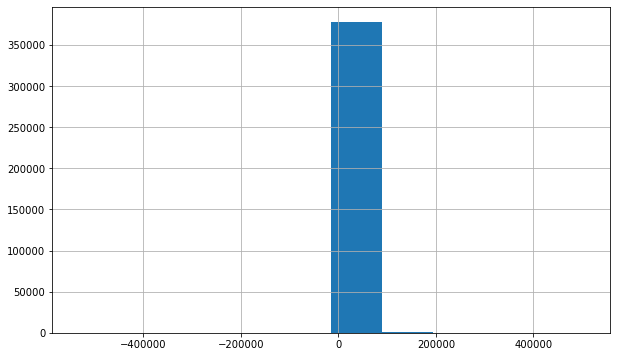

In [21]:
compa.be.hist() 

In [22]:
# Does it make sense to have a negative BE?
(compa.be<0).mean()   

0.09676316913673556

<AxesSubplot:>

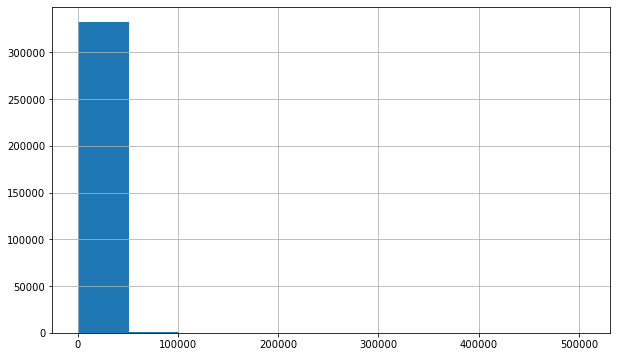

In [23]:
compa[compa.be>0].be.hist()

<AxesSubplot:>

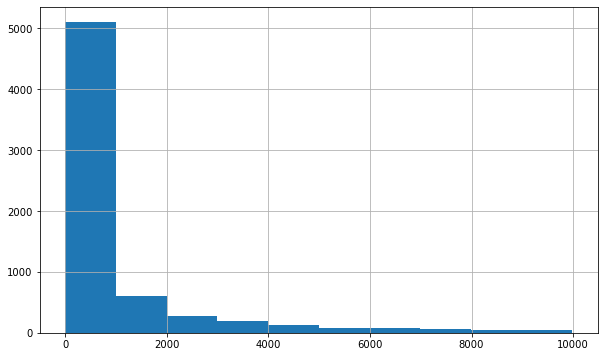

In [24]:
compa[(compa.be>0)&(compa.be<10e3)&(compa.fyear==2017)].be.hist()

## Operating Profitability (OPBE)

Daniel, Mota, Rottke, Santos (RFS, 2020) OPBE definition:

Operating profits to book equity (BE) ratio. 

Operating profits is sales (SALE) minus cost of goods sold (COGS), minus selling, general, and administrative expenses (XSGA),
minus interest expense (XINT). In order to be non-missing, SALE must be non-missing, at least one of the other entries must be non-missing and BE must be greater than zero.

In [25]:
# COST = COGS + XSGA + XINT 
compa['cost'] = compa[['cogs', 'xsga', 'xint']].sum(axis=1, skipna=True)
compa.loc[compa[['cogs', 'xsga', 'xint']].isnull().all(axis=1), 'cost'] = np.nan

In [26]:
# OP = SALE -COST    
compa['op'] = compa['sale']-compa['cost']

**Always look at your data...**

In [27]:
# Look at missings
compa.op.isnull().mean()

0.17564764001621153

<AxesSubplot:>

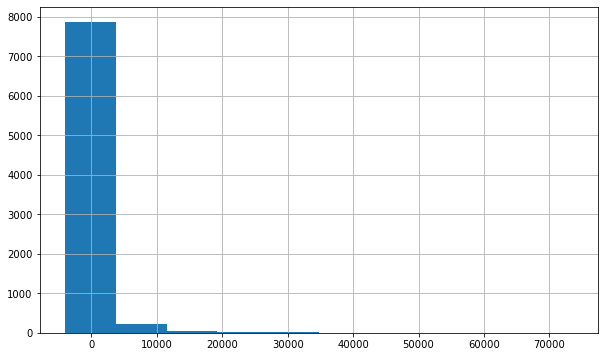

In [28]:
compa[compa.fyear==2017].op.hist()

In [29]:
# Which was the most profitable company in 2020?
compa.loc[compa[compa.fyear==2021].op.idxmax(),['gvkey','conm','op','be','at']]

gvkey                002176
conm     BERKSHIRE HATHAWAY
op                 121409.0
be                 506199.0
at                 958784.0
Name: 14010, dtype: object

<AxesSubplot:title={'center':"Apple's OP"}, xlabel='fyear'>

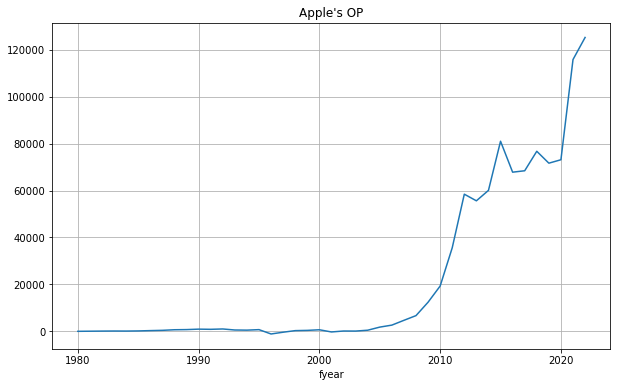

In [30]:
# Plot
compa[compa.gvkey=='001690'].set_index('fyear').op.plot(title = "Apple's OP", grid=True)

In [31]:
# Calculate OPBE
compa.loc[(compa.be > 0), 'opbe'] = compa['op']/compa['be']

**What do we do now?**

Look at the data...

In [32]:
# Look at missings
compa.opbe.isnull().mean()

0.27398814805078153

<AxesSubplot:>

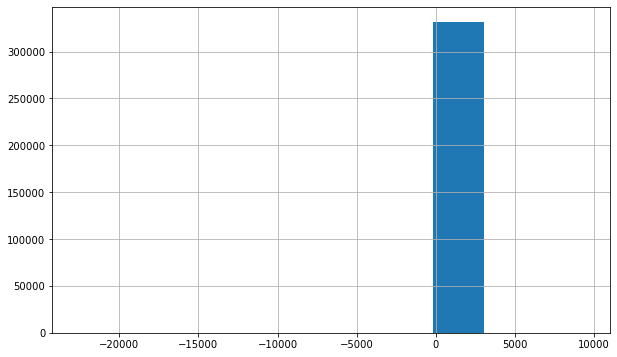

In [33]:
# Be careful with ratios
compa.opbe.hist()

<AxesSubplot:title={'center':"Apple's OPBE"}, xlabel='fyear'>

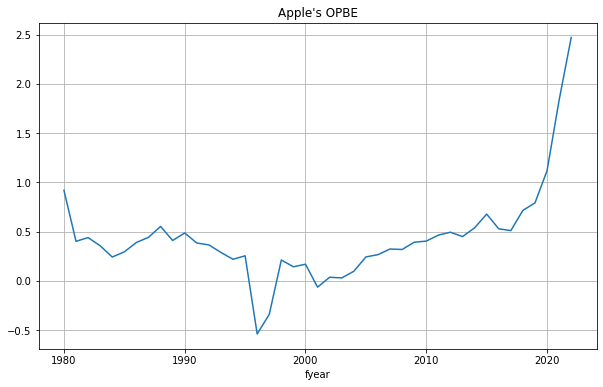

In [34]:
# Plot
compa[compa.gvkey=='001690'].set_index('fyear').opbe.plot(title = "Apple's OPBE", grid=True)

<AxesSubplot:xlabel='fyear'>

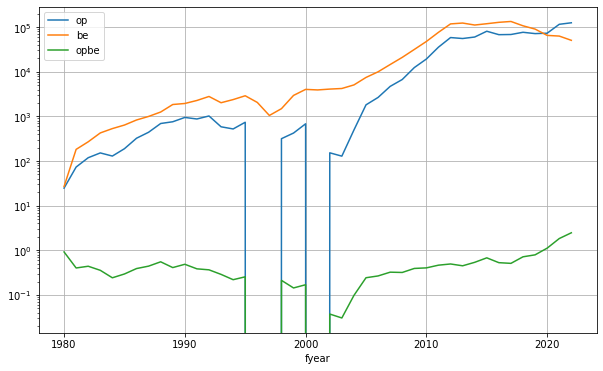

In [35]:
# plot op, be, and op/be on log scale and see difference
compa[compa.gvkey=='001690'].set_index('fyear')[['op', 'be', 'opbe']].plot(label = ["Apple's OPBE"], grid=True, logy=True)

## Investment (INV)

Daniel, Mota, Rottke, Santos (RFS, 2020) OP definition:

Total asset (AT) growth $(AT_t/AT_{t-1} - 1)$. 

We consider PERMCO as company's identification key. AT must be greater than zero to be not missing.


In [36]:
# Calculate lag assets and investment
compa.sort_values(['gvkey', 'fyear'], inplace=True)
compa['at_lag'] = compa.groupby('gvkey').at.shift(1)
compa['inv'] = (compa['at'] - compa['at_lag']) / compa['at_lag']

In [37]:
compa.inv.max()

inf

In [38]:
compa.inv.min()

-1.0

In [39]:
compa.loc[compa.at_lag==0, 'inv'] = np.nan

What if compa has missing years?

In [40]:
compa['fdiff'] = compa.groupby('gvkey').fyear.diff()

In [41]:
compa[(compa.fdiff>1)][['gvkey','fyear','fdiff', 'at','at_lag', 'inv']]

,gvkey,fyear,fdiff,at,at_lag,inv
21485,002820,2001.0,4.0,117.090,NaN,NaN
27394,003279,2011.0,19.0,NaN,1.269,NaN
29523,003469,2002.0,4.0,406.677,NaN,NaN
33048,003819,2011.0,19.0,NaN,2.295,NaN
36146,004049,2000.0,4.0,905.890,NaN,NaN
39273,004292,2012.0,3.0,0.704,0.534,0.318352
39812,004341,2000.0,2.0,0.000,NaN,NaN
40574,004412,2004.0,2.0,213.432,218.681,-0.024003
40577,004412,2008.0,2.0,219.640,203.755,0.077961
44310,004707,1996.0,3.0,14.416,NaN,NaN


In [42]:
# Check one case of skipping years
compa.loc[compa.gvkey=='005681',['gvkey','fyear','at','at_lag','inv','fdiff']]  

,gvkey,fyear,at,at_lag,inv,fdiff
55447,005681,1983.0,6803.074,NaN,NaN,NaN
55448,005681,1984.0,8885.500,6803.074,0.306101,1.0
55388,005681,1985.0,10018.598,8885.500,0.127522,1.0
55408,005681,1986.0,12074.598,10018.598,0.205218,1.0
55418,005681,1987.0,14109.098,12074.598,0.168494,1.0
55432,005681,1988.0,17008.699,14109.098,0.205513,1.0
55437,005681,1989.0,17766.699,17008.699,0.044565,1.0
54572,005681,1990.0,18259.500,17766.699,0.027737,1.0
54713,005681,1991.0,13885.098,18259.500,-0.239569,1.0
55449,005681,1995.0,26.851,13885.098,-0.998066,4.0


In [43]:
# Input missings
filter_inv = (compa['at']<=0)|(compa['at_lag']<=0)|(compa.fdiff>1)
compa.loc[filter_inv,['inv']] = np.nan
del(filter_inv)

In [44]:
# Check one case of skipping years (again)
compa.loc[compa.gvkey=='005681',['gvkey','fyear','at','at_lag','inv']]

,gvkey,fyear,at,at_lag,inv
55447,005681,1983.0,6803.074,NaN,NaN
55448,005681,1984.0,8885.500,6803.074,0.306101
55388,005681,1985.0,10018.598,8885.500,0.127522
55408,005681,1986.0,12074.598,10018.598,0.205218
55418,005681,1987.0,14109.098,12074.598,0.168494
55432,005681,1988.0,17008.699,14109.098,0.205513
55437,005681,1989.0,17766.699,17008.699,0.044565
54572,005681,1990.0,18259.500,17766.699,0.027737
54713,005681,1991.0,13885.098,18259.500,-0.239569
55449,005681,1995.0,26.851,13885.098,NaN


**What do we do now?**

In [45]:
# Look at missings
compa.inv.isnull().mean()

0.24895665604153658

In [46]:
# Be careful with ratios
compa.loc[compa.inv.idxmax(axis=0),['gvkey','conm','fyear','at','at_lag','inv']]

gvkey                         039128
conm      BROOKFIELD REINSURANCE LTD
fyear                         2021.0
at                           11493.0
at_lag                         0.001
inv                       11492999.0
Name: 296440, dtype: object

<AxesSubplot:>

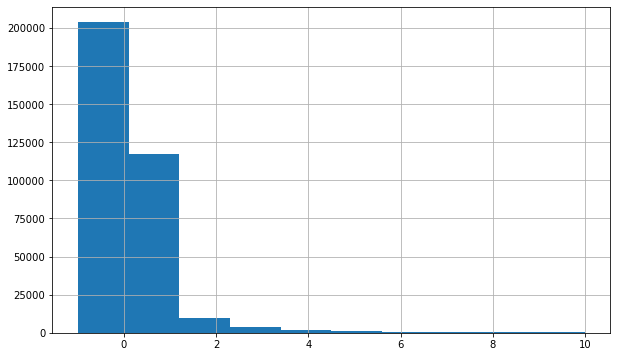

In [47]:
 # What explains such large inv?
compa[compa.inv<10].inv.hist() 

# Is Asset Growth Investment?

* See Cooper, Gulen, Schill, JF (2008);
* What is asset growth capturing other than investment? 
    * Mergers;
    * Issuance;
    * Spin-offs.
* Is it really investments that forecast future stock returns?

In [48]:
# A more traditional measure of investment: CAPX
compa['inv_capx'] = compa['capx']/compa['at_lag']
filter_inv_capx = (compa['capx']<=0)|(compa['at_lag']<=0)|(compa.fdiff>1)
compa.loc[filter_inv_capx,'inv_capx']=np.nan

<AxesSubplot:title={'center':"Apple's Investment"}, xlabel='fyear'>

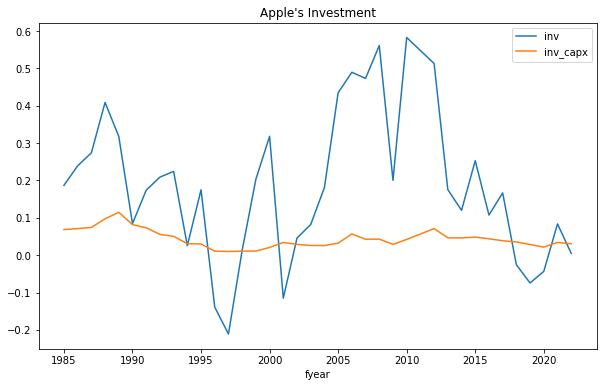

In [49]:
# Difference for Apple
compa.loc[(compa.gvkey=='001690')&
          (compa.fyear>=1985),['fyear','inv','inv_capx']
         ].set_index(['fyear']).plot(title="Apple's Investment") 

<AxesSubplot:title={'center':"Apple's Investment"}, xlabel='fyear'>

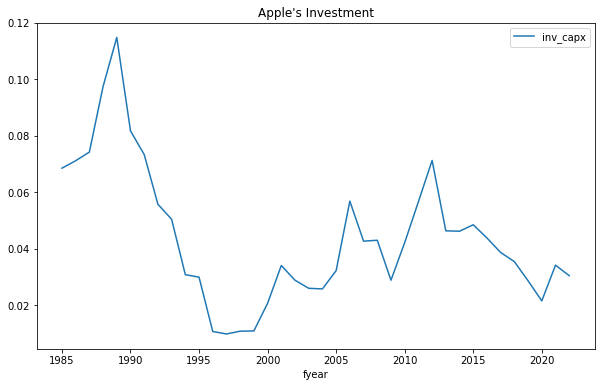

In [50]:
compa.loc[(compa.gvkey=='001690')&
          (compa.fyear>=1985),
          ['fyear','inv_capx']
         ].set_index(['fyear']).plot(title="Apple's Investment")

# Save Output

In [51]:
compa.columns

Index(['gvkey', 'datadate', 'conm', 'tic', 'cusip', 'fyear', 'fyr', 'at',
       'capx', 'ceq', 'cogs', 'csho', 'dlc', 'dlcch', 'dltt', 'dp', 'ib',
       'itcb', 'lt', 'mib', 'naicsh', 'ni', 'prstkcc', 'pstk', 'pstkl',
       'pstkrv', 're', 'revt', 'sale', 'seq', 'sich', 'txdb', 'txdi', 'txditc',
       'wcapch', 'xint', 'xlr', 'xrd', 'xsga', 'se', 'ps', 'dt', 'be', 'cost',
       'op', 'opbe', 'at_lag', 'inv', 'fdiff', 'inv_capx'],
      dtype='object')

In [52]:
compa.to_pickle(path='./compa_annual.pkl')

## For next class

**(FI)nance (RE)search Python Tools: fire_pytools**

* To make our lives easier, we will use a fire_pytools package.

* Written by our alumni, Lira Mota
    - Download the package [here](https://bitbucket.org/liramota/fire_pytools/src)

* This is a collection of useful functions in finance research.
    - Direct download of CRSP and Compustat from WRDS server
    - Direct download of Ken French data library
    - Portfolio sorts tools
    - Replicate Fama and French factors